# *"I'll take 'Webscraping' for 400, Alex"*

A look at webscraping clues from Jeopardy, 

by Matt Heckman & Brennan Donnell

## The goal of the project:

* Explore other webscraping alternatives
* Test scraping of Jeopardy questions, or 'clues'. 
* Given the categories of past games, can we classify our own questions?


## Tools used: 

* Selenium for webscraping
* Chromedriver (for automating the process). 
* bayesText.py (from A10)
* Xpath

In [1]:
import numpy as np
import time
import re
import os
from bayesText import *
from IPython.display import Image
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException

## What is Selenium? 

Selenium is a webdriver that automates a browser to scrape information. 

## Why use it over BeautifulSoup

Interactive elements on a webpage. 
Initially we were going to look at more than just clue text, so this was necessary. 

## What is 'xpath'

Point to a specific part of the page. A bit more precise than the BS4 method. 

## Webpage structure

This is what we were scraping, two per page. We got the *Categories* and then the *clues*, or the questions. 

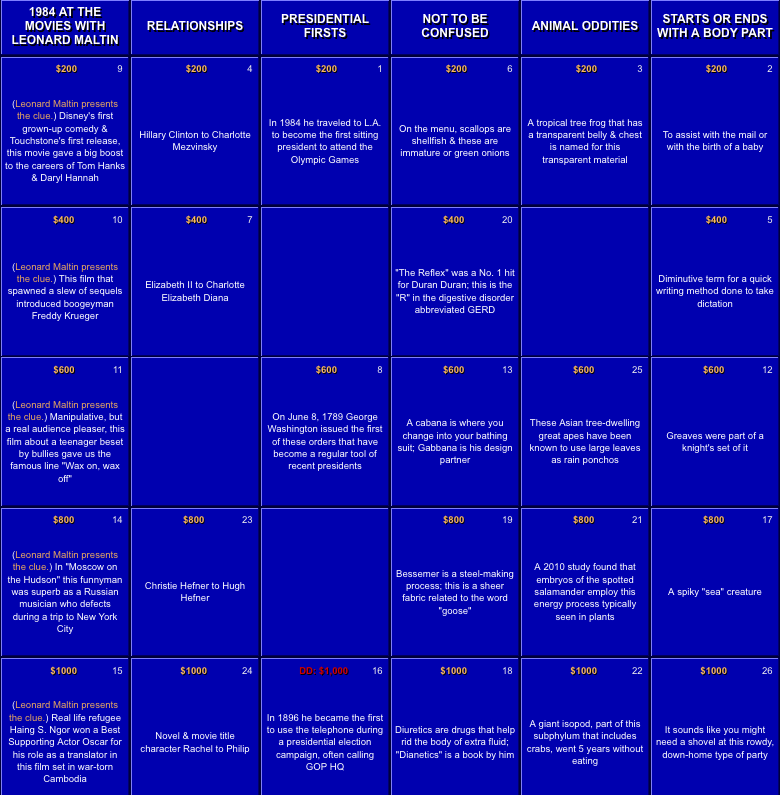

In [2]:
Image(filename='Screen Shot 2018-10-29 at 4.11.41 PM.png')

## The code: 

Purpose of the function: 
Start at a game, and then scrape both the Jeopardy and Double Jeopardy tables, then move to the next page, until there are no more pages. Each time this is done, create a folder with the name of the category and then populate the folder with the questions as text files. 

**Note: we will show the full code after the presentation. Also, the function is too long to fit on a slide**. 

In [3]:
def drive_jeopardy_clue():
    chromedriver = ""
    os.environ["webdriver.chrome.driver"] = chromedriver
    driver = webdriver.Chrome(chromedriver)
    count = 1
    driver.get("http://www.j-archive.com/showgame.php?game_id=2037")
#     driver.maximize_window() # It didn't like this. 
    while count < 6: #initially set to 300
        title_bs4 = driver.find_element_by_xpath('//*[@id="game_title"]/h1')
        print(title_bs4.text)
        for j in range(1, 7):
            category_bs4 = driver.find_element_by_xpath(
                '//*[@id="jeopardy_round"]/table[1]/tbody/tr[1]/td[' + str(j) +
                ']/table/tbody/tr[1]/td')
            category = category_bs4.text
            print('\t' + category)
            jeopardy_directory = "Jeopardy_scraping/"
            if not os.path.exists(jeopardy_directory + category + '/'):
                os.makedirs(jeopardy_directory + category + '/')

            for i in range(1, 6):
                try:
                    clue_text_bs4 = driver.find_element_by_xpath(
                        '//*[@id="clue_J_' + str(j) + '_' + str(i) + '"]')
                    clue_text = clue_text_bs4.text
                    print('\t\t' + clue_text)
                    file = open(
                        jeopardy_directory + category + '/' + str(i) + ".txt",
                        "w")
                    file.write(clue_text)
                    file.close()
                except (NoSuchElementException):
                    print('no element')
        print('done with jeopardy, on to double jeopardy')
        for j in range(1, 7):
            category_bs4 = driver.find_element_by_xpath(
                '//*[@id="double_jeopardy_round"]/table[1]/tbody/tr[1]/td[' +
                str(j) + ']/table/tbody/tr[1]/td')
            category = category_bs4.text
            print('\t' + category)
            jeopardy_directory = "Jeopardy_scraping/"
            if not os.path.exists(jeopardy_directory + category + '/'):
                os.makedirs(jeopardy_directory + category + '/')

            for i in range(1, 6):
                try:
                    clue_text_bs4 = driver.find_element_by_xpath(
                        '//*[@id="clue_DJ_' + str(j) + '_' + str(i) + '"]')
                    clue_text = clue_text_bs4.text
                    print('\t\t' + clue_text)
                    file = open(
                        jeopardy_directory + category + '/' + str(i) + ".txt",
                        "w")
                    file.write(clue_text)
                    file.close()
                except (NoSuchElementException):
                    print('no element')

        try:
            # add a wait
            next_page = driver.find_element_by_xpath(
                '//*[@id="contestants_table"]/tbody/tr/td[3]/a')
            actions = ActionChains(driver)
            actions.move_to_element(next_page)
            actions.click()
            actions.perform()
            count = count + 1
            print(count)
        except (NoSuchElementException):
            print('no new page')
            driver.close()
            break
    driver.close()
    return

## Running the code

Calling the `drive_jeopardy_clue()` function starts at Monday, September $8^{th}$, 2003, and then goes through the next $n$ games unless there is no *next game* button. 

For this demo, let $n=5$

In [4]:
drive_jeopardy_clue()

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


## Classifying the clues

### Restrictions
* Time Constraints
* Grouping of categories
* Insufficient data for a full training & test

In [6]:
baseDirectory = '20news-bydate/'
trainingDir = baseDirectory + "archive_redux copy/"
testDir = baseDirectory + "20news-bydate-test/"
print('Stoplist 1')
bT = BayesText(trainingDir, baseDirectory + 'stopwords_bbc.txt')

Stoplist 1
Counting ...
    TV TRANSPORTATION
    IN THE DICTIONARY
    ON LOCATION
    ROTC
    SMALL TOWN FOLKS
    U.S. "S"ITIES
    FAMILY GROUPS
    "E"OGRAPHY
    THE WORKING CLASS
    SURVIVOR: CONGRESS
    "HEAD"S UP!
    OFFICIAL STATE THINGS
    RIMBAUD
    STARBUCKS
    BELOVED BELARUS
    "MID" TERMS
    HORNED ANIMALS
    ADJECTIVES
    THE BOYS IN THE BAND
    ALSO A BOOK OF THE BIBLE
    HEADWEAR
    CLASSIC COMIC STRIPS
    RELIGIOUS HOMOPHONES
    FAMOUS WOMEN
    FILM SHORTS
    DECEMBER 1st
    KNIGHTS WHO SAY "NI"
    CAR NAMES
    HISTORIC QUOTES
    NOTABLE WOMEN
    C'EST LA TV
    HOOP-LA
    OCEAN NOTIONS
    RUSSIAN AROUND
    THE NATIONAL CIVIL RIGHTS MUSEUM
    RESEARCH
    PUTIN
    ELIs
    MAPS
    DOGS
    UR
    STATES BY CITIES & TOWNS
    KANSAS CITY HERE WE COME
    DATE & PLACE
    ANNUAL EVENTS
    PRO SPORTS VENUES
    O FOR A
    BALLPARK FIGURES
    SHE'S CANADIAN, EH?
    A WHALE OF A CATEGORY
    WORLD OF FOOD
    HOBBY TIME
    REMEMBER 1995?

    THE MIDDLE AGES
    "NICK" NAMES
    WOULD YOU LIKE SOME GUAM?
    CHINESE HISTORY
    THE "TEMP"-IST
    PRESS YOUR LUKE
    3-LETTER PALINDROMES
    ADVERBS
    PEACE CORPS
    BEST PICTURES IN OTHER WORDS
    CEREMONIES
    FILMS OF THE '90s
    THEY PUT ME ON HOLD AGAIN!
    COMMON BONDS
    THE "O.C."
    BEYOND REASON
    OPERA SCARES ME
    RUSSIAN CULTURE
    SUPREME COURT DECISIONS
    THE EUROPEAN DIRECTOR'S CHAIR
    MOVIE GROUPS
    WELCOME BACK, QATAR
    PARDON ME
    THE NEW YORK YANKEES
    "P"s TIME
    WORD & PHRASE ORIGINS
    Y-R
    IT'S TIME FOR SPORTS
    THE TIGERS
    "J" WALKING
    THE PLAGUE
    THE 20TH CENTURY
    BASEBALL NICKNAMES
    FROM A TO E
    C D "B"
    TEA TIME
    LITERATURE
    PARTS OF THE WHOLE
    SOCIOLOGY
    POSTAL ABBREVIATION SPELLING
    THE JEOPARDY! TIME MACHINE
    ALL ABOUT ELEPHANTS
    ROAD MOVIES
    MULTIPLE TONY WINNERS
    HALIFAX ME
    AFI's 100 YEARS, 100 SONGS
    SCIENTIFIC DISCOVERIES
    FOREVER 39
    MOVIE SEQU

    THE 2004 PRESIDENTIAL RACE
    COUNTRY COOKING
    NOTHING "BUT"
    EATERS DIGEST
    LET'S GO LOBSTERING
    BUSINESS
    1959
    MUSIC ON MY iPOD
    MOVIE MUSIC
    PUMP AND CIRCUMSTANCE
    DISCOVERY
    A "D" IN HISTORY
    INVENTIVE MINDS
    SUBWAY STOPS
    SCIENCE
    FOOD FRANCHISE HISTORY
    BEASTLY COMMON BONDS
    COMPUTER "I"s
    USTA
    POPE-ULARITY CONTEST
    FAMOUS QUOTATIONS
    OLD BUSINESS
    HOOKED ON PHOENIX
    MOVIE SONGS
    TECHIES
    RABBI
    WOMEN IN SPORTS
    ANIMAL WORDS & PHRASES
    AFRICAN-AMERICANA
    OF YOUR "LOVE"
    THEORIES
    AFTER THE WHITE HOUSE
    BORN ON THE FOURTH OF JULY
    "YELLOW" FEVER
    THE END
    ART "C"
    GOING TO THE DOCTOR
    IT'S ELEMENTAL
    YALIES -- THEY'RE SO DRAMATIC!
    SIGNS OF THE ZODIAC
    FRENCH LESSONS
    NOBEL CATEGORIES BY WINNER
    MOVIE QUOTES
    THE NATIONAL MUSEUM OF HEALTH & MEDICINE
    LET'S RUN IT UP THE FLAGPOLE
    (Alex: And finally, something you hear in my house a lot...)
    

    ARCHAIC WORDS
    CINEMA TRIVIA
    BASEBALL LEGENDS
    RHYMES WITH A PLANET
    THE DIRECTOR'S CHAIR
    TRAVEL EUROPE
    AVIATION
    KENNEDY CENTER HONORS DANCERS
    MIND IF I LEAD?
    CROSSWORD CLUES "C"
    HE GOT "GAME"
    RHYME
    POETRY
    "NO" FUN
    GRAPHIC NOVELS
    "E"ASY DOES IT
    I'M ON A DIET
    (Alex: And because Thanksgiving's coming...)
    GILBERT & SULLIVAN
    SHAKESPEAREAN ACTORS
    CANADA, EH
    MY NEWT
    NFL TEAM PLAYERS
    "I" CATCHING
    WILLIAMS
    AFRICAN-AMERICAN WOMEN
    WHAT AM I HAVING?
    MYTHOLOGICAL PAINTINGS
    INSIDE SCIENCE
    I'M NOT A DOCTOR, BUT I PLAY ONE ON TV
    STORY COLLECTIONS
    THE 1870s
    ENGLISH LITERATURE
    UNION MEN & WOMEN
    FAIRBURY, NEBRASKA
    "TA" TA FOR NOW
    WASHINGTON SCHLEPPED HERE
    TIPS FROM THE ANCIENTS
    J.R.R. TOLKIEN
    FIRST CLASS
    SCRAMBLED VEEPS
    YOU BETTER KNOW SOME SCIENCE
    '70s HITS
    KATZ IN THE CRADLE
    1804
    DOORS
    DOG & CAT TALES
    SHOCKING!
    

    JUNE BUGGED
    NICKNAMES
    "F" TRUE HOLLYWOOD STORY
    FEMININE TERMS
    "M"USIC
    JULIA
    INCREDIBLE EDIBLES
    ABBR.
    THE KING IS DEAD
    1990
    YOU GET AN "F"
    MI CASA ES SU CASA
    HERE I AM AT...
    3-LETTER ANAGRAMS
    CAPITOL THINKERS
    "Y"? BECAUSE WE LIKE YOU!
    ENDS IN "U"
    HISTORIC AMERICANS
    A HIT TWICE
    "D" TALKS
    MILITARY MATTERS
    FITNESS
    THANKS FOR THE MEMOIRS
    UNUSUAL PLANTS
    GARDENING
    MADONNA SONGS
    U.S. CITIES
    TV SHOWS & THEIR CHARACTERS
    SYLVESTER STALLONE
    COUNTRY MUSIC HALL OF FAME
    MERYL STREEP
    2-LETTER ABBREV.
    SPORTS NAMES
    VEGAS ON FILM
    DOUBLE "L" WORDS
    NEW ZEALAND
    ARTISTS
    POLITICAL MOVIES
    THE PENDULUM
    '70s MUSIC
    THAT'S POETRY TO MY EAR
    MUSICAL IDIOMS
    LITTLE FEAT
    FILING CHAPTER 11
    STUFF TO DO AT RECESS
    THE CHURCH LADY
    HERE PIG
    DAISY CRAZY
    MILITARY MEN
    INTERIORS
    DAY-OFF ACTIVITIES
    STARTS & ENDS WITH "A"
    

    NONPOTENT POTABLES
    NAMES FROM THE GERMAN
    HISTORIC NOVELS
    SENATORIAL SUCCESSORS
    "G" MEN
    THE SMALLEST IN AREA
    HAMLETS
    STATE LINES
    COUNTRY SINGERS' NO. 1 HITS
    "OUT"s
    TV SIDEKICKS
    CIGARETTE LORE
    PLANT PARENTHOOD
    EARLY AMERICA
    1845
    IN YOUR HEARTS
    AVERAGE
    EPONYMS
    GEOGRAPHY
    THE QUEEN'S ENGLISH
    B.C.'n YOU
    NUCLEAR PHYSICS
    BIBLE BASICS
    "DEATH"
    ON THE "M"AP
    BROADWAY MUSICALS
    CLASSIC CARTOON CHARACTERS
    AIRLINES
    SMART ANSWERS
    WEBSITES
    PRESIDENTS BY KIDS
    WHAT 4
    QUASI-RELATED PAIRS
    SESAME STREET
    THE 1900s
    LITERARY TRANSLATIONS
    VOCABULARY
    RIVERS
    18th CENTURY AMERICA
    ART FOR ART'S SAKE
    DINOSAURS
    MEDICAL MATTERS
    THE QUOTABLE NIXON
    U.S. STATES
    "T"-HE
    (Alex: We'll take you somewhere on...)
    COMMUNICATIONS
    DECORATING
    TRAVEL GERMANY
    THE WALTONS
    COMPLETES THE PLAY TITLE
    BIG JOHNS
    WASHINGTON POST CARDS

    CLASSIC SCI-FI & HORROR FILMS
    MOVIE COMEDIES
    BARTENDING
    PEOPLE IN SONG
    TRANSPORTATION
    STATE HOLIDAYS
    HOMOPHONIC NAMES
    BIG SCREEN BIOS
    PLACES TO GO AFTER YOU'RE DEAD
    A BRAND NEW "YOU"
    NEW YORK GOVERNORS
    HOAXES
    THE NATIONAL BOOK AWARDS
    BEN & JENNIFER FILMS
    BEN FRANKLIN
    A HEAD FOR BUSINESS
    "TOUCH" ME
    BRING OUT YOUR DEAD
    ENDS IN "OO"
    WHEN I WAS YOUR AGE...
    CONTRACTIONS
    A BEASTLY CATEGORY
    PEAS
    EVENTS IN THE OLYMPIC DECATHLON
    SUDDENLY, LAST SUMMER
    RATED PG
    MUSIC MAKERS
    ENDS IN "OLD"
    HOLEY
    @$&!
    DUDE, WHERE'S MY CZAR?
    ON THE "LAM"
    SPOT THE POOCH
    WORLD LIT
    THE 50 STATES
    GIANT
    THAT'S MY SCHOOL!
    CHARACTERS IN MUSICALS
    CABLE TV
    THE PIPE ORGAN
    BIG DAYS ON THE COURT
    MR. POTATO HEAD
    CULINARY QUOTES
    MARSHMALLOW MADNESS
    COLORS OF THE RAINBOW
    CHORES
    WHAT THE "L"?!
    WHAT'S YOUR SINE?
    THE "DOOR"s
    20th CENTURY 

    Q-P
    A GREEN THUMB
    SHAKESPEARE, THE SITCOM
    HYBRID FRUIT
    U.S. CITY NICKNAMES
    A TIME TO BUILD UP
    CARY GRANT FILMS
    RIVER DEEP, MOUNTAIN HIGH
    GROSS NATIONAL PRODUCTS
    SOLDIER OF MISFORTUNE
    DON'T LOSE YOUR TRAIN OF THOUGHT
    KENNEDY FAMILY MEMBERS
    BOOK TO MOVIE
    MOVIE ROLES
    THE NEW YORK STOCK EXCHANGE
    WHAT A DOLL!
    IMAGINARY RACES
    THE FIRST WIVES CLUB
    STARTS WITH "R"
    A CATEGORY ABOUT NOTHING
    STATES' MEN
    PRUFROCKIAN PONDERINGS
    PILOT TALK
    CRUISIN' THE CARIBBEAN
    MEASURE FOR MEASURE
    FEATHERS
    TOYS & GAMES
    SOUNDS THE SAME
    SPORTSMEN
    WHAT EXIT ARE YA FROM?
    DOUBLE "L"
    MAIN STREET U.S.A.
    MODERN DANCE
    "F" TROOP
    (Alex: One of my favorite categories...)
    TRASH TALKIN'
    WHAT'S "D" MATTER?
    HAIR TODAY
    AUTHORS
    TECHNOLOGY
    "E" MALE
    THE NEXT SOUND YOU HEAR...
    CONNECTICUT
    MY AUNTIE THE POET
    ASK YOUR DOCTOR...
    TRAINING DAY
    STATE FLAGS


    I'VE GOT SUPERNATURAL POWERS
    ___ & ___
    FOOD, GLORIOUS FOOD
    "X"2
    ALL THE PRESIDENTS' CHILDREN
    1968
    COMEDY FILMS
    I'M "L__X"
    WE WANT PISA!
    MYTH, ALL "O", GEE!
    ALL "DE" PEOPLE
    THE PLANETS
    EDUCATION
    "W"RITERS
    STORIED HOTELS
    GOING NATIONAL
    NORSE MYTHOLOGY
    BRAND "X"
    WHICH TV SHOW CAME FIRST?
    "ARG"
    1995
    POP MUSIC PAIRINGS
    NAMES IN MEDICINE
    "V"ARIETY
    FULL "MOON"
    CLASSICAL MUSIC
    1961
    (Alex: The person who links all of these together is...)
    THE 2004 PRESIDENTIAL RACE
    COUNTRY COOKING
    NOTHING "BUT"
    EATERS DIGEST
    LET'S GO LOBSTERING
    BUSINESS
    1959
    MUSIC ON MY iPOD
    MOVIE MUSIC
    PUMP AND CIRCUMSTANCE
    DISCOVERY
    A "D" IN HISTORY
    INVENTIVE MINDS
    SUBWAY STOPS
    SCIENCE
    FOOD FRANCHISE HISTORY
    BEASTLY COMMON BONDS
    COMPUTER "I"s
    USTA
    POPE-ULARITY CONTEST
    FAMOUS QUOTATIONS
    OLD BUSINESS
    HOOKED ON PHOENIX
    MOVIE

    ANCIENT HISTORY
    "A"NCIENT GREEKS
    PHOBIAS
    GREAT MOMENTS IN TRAVEL
    IT'S ALL IN YOUR HEAD
    WORLD RELIGION
    BLACK & WHITE TV
    FASCINATING BIBLE FACTS
    HOCKEY TEAMS' HOMES
    CLOCKED
    WHICH U.S. CABINET DEPARTMENT?
    SPANISH CLASS
    HENRY WHO?
    COLLEGE TEAM NICKNAMES
    QUOTH THE RAVEN?
    ENTERTAINERS OF THE PAST
    WHIRLED CAPITALS
    "Z" END
    CELL BLOCK CINEMA
    STOP PULLING MY CHENEY
    WARTIME IMAGES
    ISMs
    CLASSICAL COMPOSERS
    HALF A NICE DAY
    OLD TESTAMENT WHO'S WHO
    PRIME MIME
    AUGUST
    SCIENTIFIC PREFIXES
    DISCO IN-FILM-O
    MOOLA MOOLA
    4-LETTER X-RATED WORDS
    SONG BIRDS
    NOBEL PEACE PRIZE WINNERS
    GIMME AN "S"!
    SPORTS MASCOTS
    SHAKESPEARE'S SMALL PARTS
    MUSIC IN "C"
    CHRISTMAS
    OIL!
    (Alex: We want you to identify the work in...)
    COME HERE OFTEN?
    "R"
    SINGERS
    100
    MOVIE TITLE TRANSLATIONS
    LIFETIME
    FATHER KNOWS BEST
    THROW IT OVER HERE
    VICE P

    A TRIP TO THE MOON
    AROUND THE BODY
    TERM ME LOOSE
    MR. BUSINESSMAN
    SURVIVORS
    WRITERS ON FILM
    SAINTS
    SPORTS RECORDS
    MEDICINE
    FILMED IN HAWAII
    AMERICAN HISTORY
    LORD OF THE RING
    BORN & DIED
    "ARF"
    FORMER STATE GOVERNORS
    NEW YORK CITY HISTORY
    BEDTIME
    "ANT" INFESTATION
    WHILE YOU WERE "OUT"
    SIOUX
    '60s POTPOURRI
    DOME, SWEET DOME
    PEOPLE
    FAMOUS CEMETERIES
    SCIENCE & TECHNOLOGY
    ROCK
    BIG SCREEN BIO SUBJECTS
    CUT
    AH, SWEET MISTER"E"
    DAUGHTERS OF THE AMERICAN REVOLUTION
    POP LIT
    CHILDREN IN LITERATURE
    BUNDESTAG PARTY
    A HOOSIERS WHO'S WHO
    EQUIVALENTS
    THE HANGED MAN
    BODY PARTS BY PRODUCTS
    FOOD
    "C"OUNTRIES
    HISTORY
    OH, THAT MARIA!
    COURT MONARCHS
    ART SCHOOL
    '60s MUSIC SCENE
    DRUGS IN THE MOVIES
    "DON'T" FORGET THIS SONG
    FOR GOOD MEASURE
    LICENSE PLATE SLOGANS
    HOW DO YOU...
    PLANT THE EVIDENCE
    (Alex: A whole categ

    VULTURE CULTURE
    MEET THE PRESS
    FOR THE BIRDS
    THERE ARE PLACES
    THE '60s
    A SOLDIER'S STORY
    HISTORY HAPPENED HERE
    COLLEGE BASKETBALL
    1954
    MR. & MYTH
    DA BRONX
    FRENCH FOOD
    OF THE KALAHARI
    "R"T
    MIDWESTERN CITIES
    OSCAR WILDE & CRAZY GUY
    OPERAS YOU'LL LIKE
    RHODE ISLAND
    LET'S CLEAN UP
    LEFTOVERS
    1953
    20th CENTURY WOMEN
    POE-POURRI
    YOU'RE MAKING ME "MAD"
    ORGANIZED RELIGION
    NATIONAL SITES
    MUSICAL SETTINGS
    TULIPS
    SHAMPOO
    FOOD HISTORY
    HOOP OF THE DAY
    HISTORICAL PEOPLE
    BOOK TITLES
    MIXED DOUBLES
    PLACES FOR ANIMALS
    BMW
    A, B, C
    THE BUSINESS OF AMERICA
    19th CENTURY AMERICA
    HOT SAX
    SCREEN NAMES
    MUSIC CLASS
    IN THE BIG INNING
    LOVE, HONOR OR OBEY
    TICKET TO RIDE
    OVERNIGHT DELIVERY
    FOOD CHAIN
    PICTURESQUE
    "D.C."
    THE ANIMAL KINGDOM
    A THOUSAND SOMETHING
    MOVED TO FRANCE
    CRIME
    THE GENE POOL
    CHILDREN'

## How does the model do? 

In [7]:
print("Running Test ...")
class_path = '20news-bydate/'
print("Classify post@classify1:", bT.classify(class_path + "classify_jeopardy3.txt"))
print("Classify post@classify2:", bT.classify(class_path + "classify_jeopardy2.txt"))
print("Classify post@classify3:", bT.classify(class_path + "classify_jeopardy4.txt"))
print("Classify post@classify4:", bT.classify(class_path + "classify_jeopardy1.txt"))

Running Test ...
Classify post@classify1: LEFT TO MY OWN DEVICES
Classify post@classify2: MOVIE TAGLINES
Classify post@classify3: WE "LOVE" LITERATURE
Classify post@classify4: THE VEEP


## The texts classified: 


## The texts classified: 

* **First**: Nintendo's original handheld gaming device. (What is the GameBoy)

## The texts classified: 

* **Second**: This multi-film franchise takes place in a galaxy far far away. (What is Star Wars) 

## The texts classified: 

* **Third**: Michael Crichton's novel about genetically engineered dinosaurs. (What is *Jurassic Park*)

## The texts classified: 

* **Fourth**: This famous general became the first president of a fledgling nation after a war of independence and was unanimously elected. (Who is George Washington)

## Where to improve? 
* Combine similar categories
* Get more data
* Set up a training/test set

# Thank you